In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import os

In [2]:
dfs = []
for file in os.listdir('data/'):
    dfs.append(pd.read_csv(f'data/{file}', index_col=0))

df = pd.concat(dfs, axis=0, ignore_index=True)

In [3]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


# Atributes
- **year**: year of data in this row
- **month**: month of data in this row
- **day**: day of data in this row
- **hour**: hour of data in this row
- **PM2.5**: PM2.5 concentration (ug/m^3) - častice menšie ako 2,5 micrometra
- **PM10**: PM10 concentration (ug/m^3) - častice menšie ako 10 micromotrov a väčšie ako 2,5
- **SO2**: SO2 concentration (ug/m^3)
- **NO2**: NO2 concentration (ug/m^3)
- **CO**: CO concentration (ug/m^3)
- **O3**: O3 concentration (ug/m^3) - Ozón
- **TEMP**: temperature (degree Celsius)
- **PRES**: pressure (hPa)
- **DEWP**: dew point temperature (degree Celsius)
- **RAIN**: precipitation (mm)
- **wd**: wind direction
- **WSPM**: wind speed (m/s)
- **station**: name of the air-quality monitoring site
    
src: https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data#


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


In [5]:
numerical_atributes = ["year", "month", "day", "hour", "PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
df.loc[:, numerical_atributes].describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [6]:
categorical_atributes = ["wd", "station"]
df.loc[:, categorical_atributes].describe()

,wd,station
count,418946,420768
unique,16,12
top,NE,Aotizhongxin
freq,43335,35064


Záznamy obsahujú dáta zbierané z 12 róznych staníc.
Smer vetra je určovaný s presnosťou na 22,5° teda s rozlišením na S, SSV, SV, VSV, V

In [7]:
print(df['station'].unique())
print(df['wd'].unique())
print(df['year'].unique())
print(df['month'].unique())
print(df['day'].unique())
print(df['hour'].unique())

['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']
['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]
[2013 2014 2015 2016 2017]
[ 3  4  5  6  7  8  9 10 11 12  1  2]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [8]:
df.groupby('station').size()

station
Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
dtype: int64

Všetky stanice nazbierali rovnaký počet dát, to je 35 064

In [9]:
df.isna().sum()

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [10]:
df.isna().sum().sum()

74027

Dokopy dáta obsahujú 74 027 chýbajúcich údajov

In [11]:
by_station = df.groupby('station').mean()

In [12]:
by_station.sort_values(by = 'TEMP')

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
station,,,,,,,,,,,,,,,
Huairou,2014.66256,6.52293,15.729637,11.5,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
Shunyi,2014.66256,6.52293,15.729637,11.5,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
Wanliu,2014.66256,6.52293,15.729637,11.5,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
Guanyuan,2014.66256,6.52293,15.729637,11.5,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
Aotizhongxin,2014.66256,6.52293,15.729637,11.5,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
Dongsi,2014.66256,6.52293,15.729637,11.5,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
Tiantan,2014.66256,6.52293,15.729637,11.5,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
Nongzhanguan,2014.66256,6.52293,15.729637,11.5,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
Dingling,2014.66256,6.52293,15.729637,11.5,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836


Ako vidíme, najväčšia priemerná teplota bola na stanici Gucheng a najmenšia na stanici Huairou

In [13]:
by_station.sort_values(by = 'CO',ascending = False)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
station,,,,,,,,,,,,,,,
Wanshouxigong,2014.66256,6.52293,15.729637,11.5,85.024136,112.223459,17.148603,55.529560,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
Dongsi,2014.66256,6.52293,15.729637,11.5,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
Nongzhanguan,2014.66256,6.52293,15.729637,11.5,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
Gucheng,2014.66256,6.52293,15.729637,11.5,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
Wanliu,2014.66256,6.52293,15.729637,11.5,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
Tiantan,2014.66256,6.52293,15.729637,11.5,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
Guanyuan,2014.66256,6.52293,15.729637,11.5,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
Aotizhongxin,2014.66256,6.52293,15.729637,11.5,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
Shunyi,2014.66256,6.52293,15.729637,11.5,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533


Stanica s najväčším priemerným zničistením uhlíka je Wanshouxigong.

In [14]:
df['Datetime'] = pd.to_datetime(df.year*1000000 + df.month*10000 + df.day*100 + df.hour, format="%Y%m%d%H")
df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

Pre grafovanie môžme vytvoriť nový stĺpec s časovými údajmi namiesto 4 jednotlivých stĺpcov

<AxesSubplot:xlabel='PM2.5', ylabel='station'>

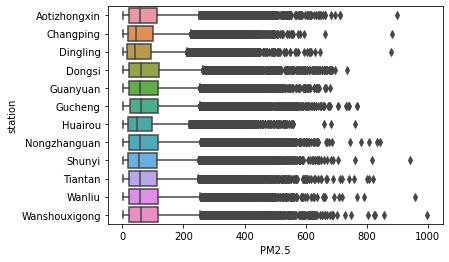

In [15]:
sns.boxplot(data=df, y=df['station'], x=df['PM2.5'])

<AxesSubplot:xlabel='PM10', ylabel='station'>

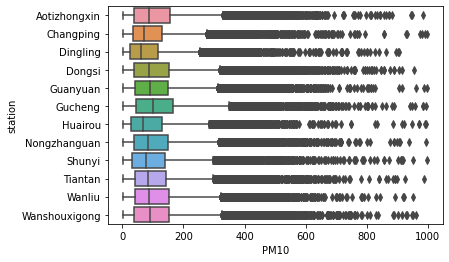

In [16]:
sns.boxplot(data=df, y=df['station'], x=df['PM10'])

<AxesSubplot:xlabel='SO2', ylabel='station'>

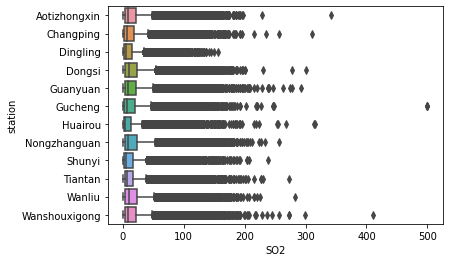

In [17]:
sns.boxplot(data=df, y=df['station'], x=df['SO2'])

<AxesSubplot:xlabel='NO2', ylabel='station'>

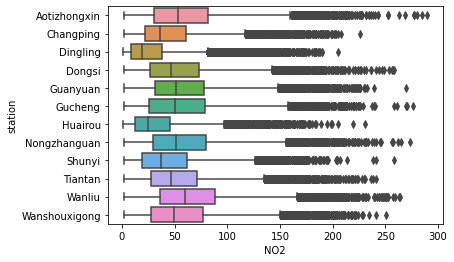

In [18]:
sns.boxplot(data=df, y=df['station'], x=df['NO2'])

<AxesSubplot:xlabel='CO', ylabel='station'>

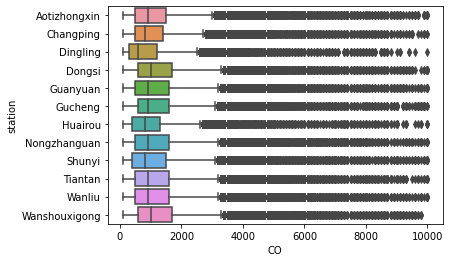

In [19]:
sns.boxplot(data=df, y=df['station'], x=df['CO'])

<AxesSubplot:xlabel='O3', ylabel='station'>

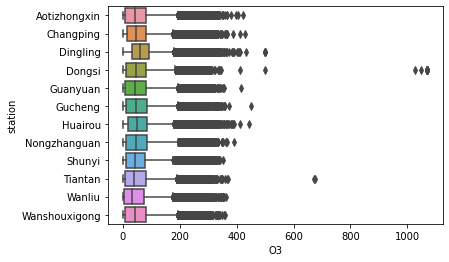

In [20]:
sns.boxplot(data=df, y=df['station'], x=df['O3'])

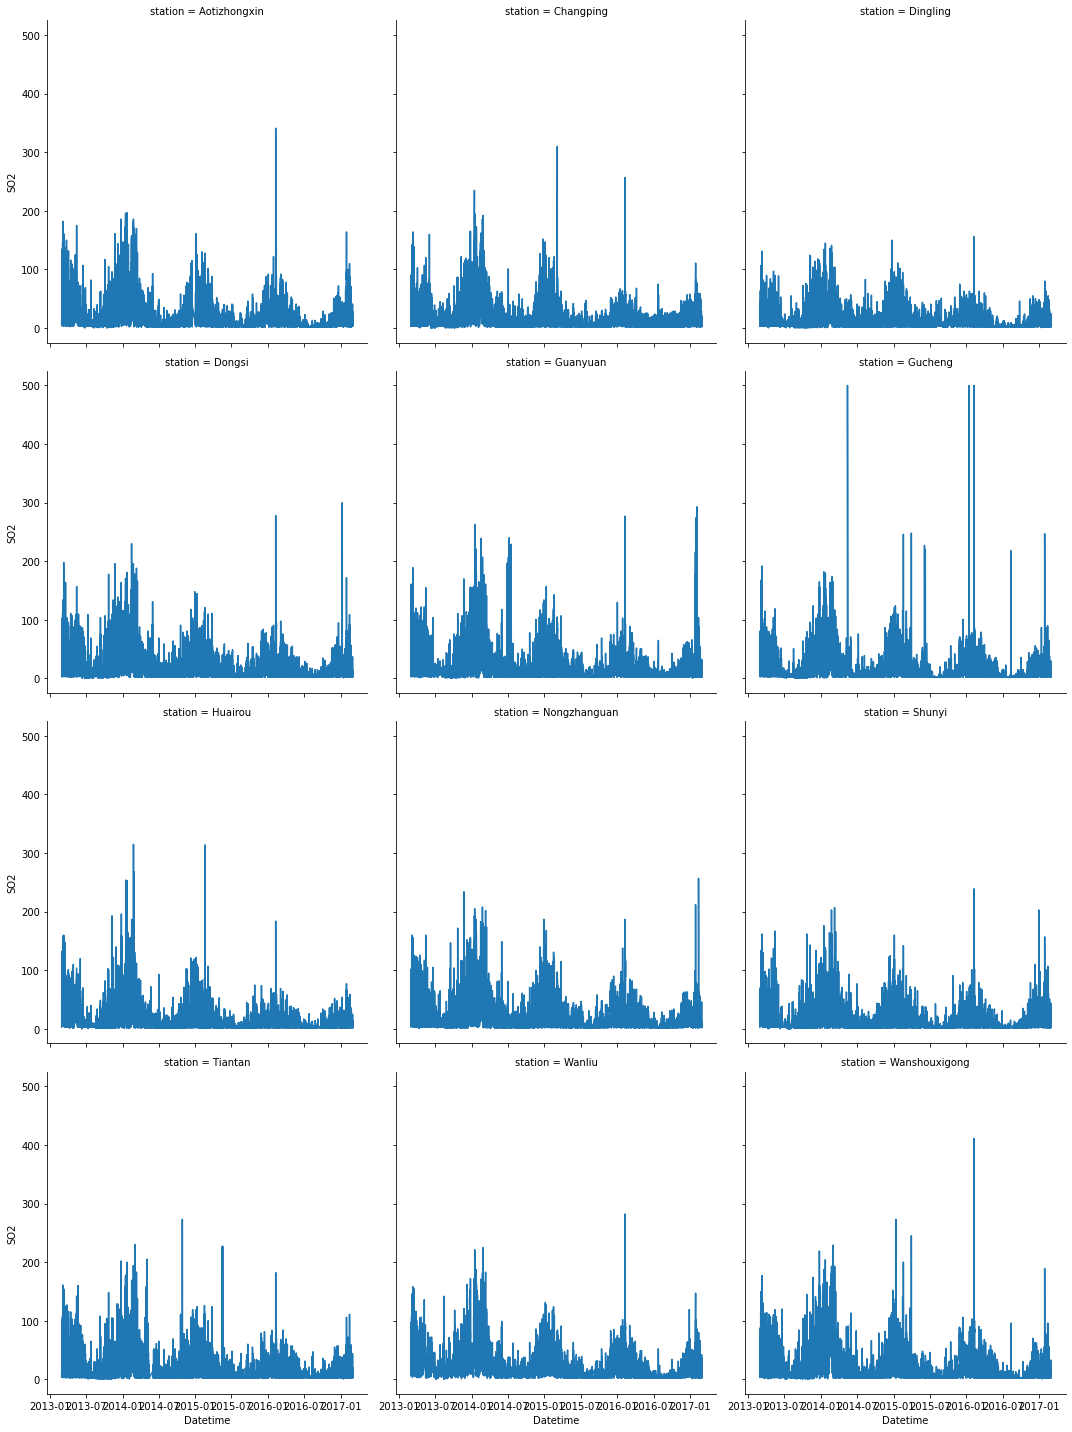

In [21]:
sns.relplot(data=df, x='Datetime', y='SO2', col='station', col_wrap=3, kind='line')

Grafy ukazujú, že množstvo oxidu siričitého sa postupne počas meraní znižovalo

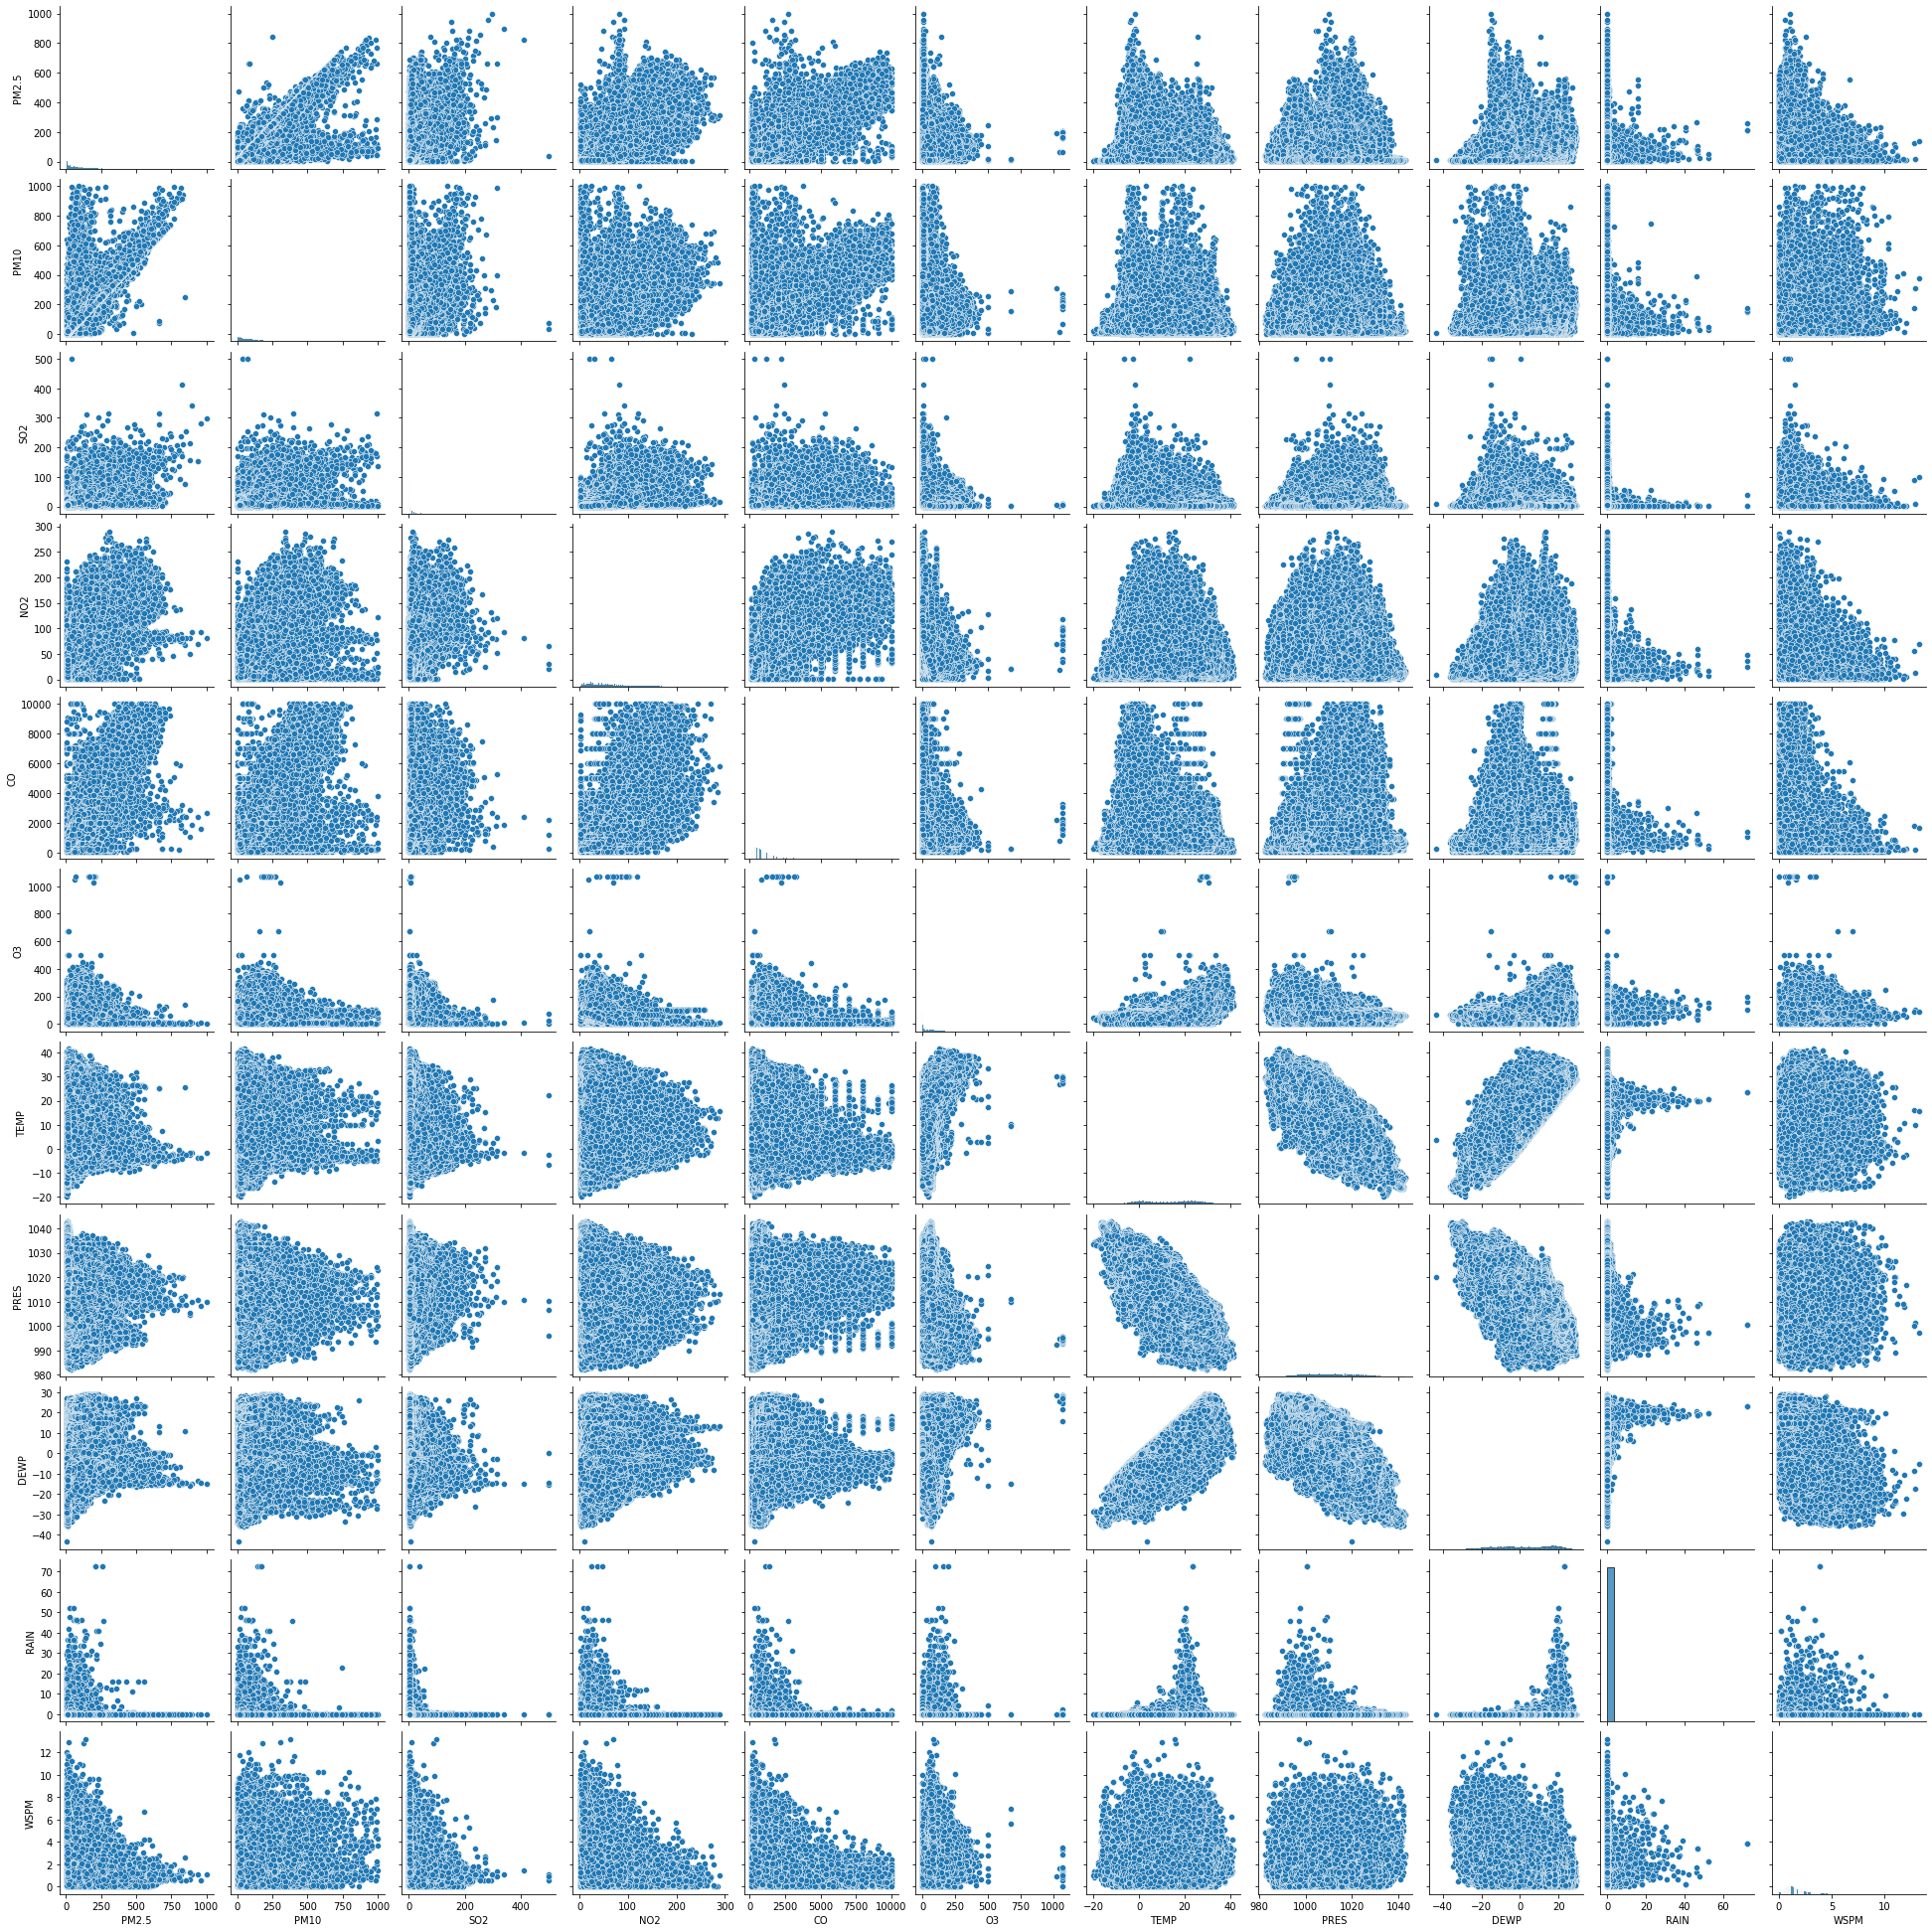

In [22]:
sns.pairplot(df)

<AxesSubplot:>

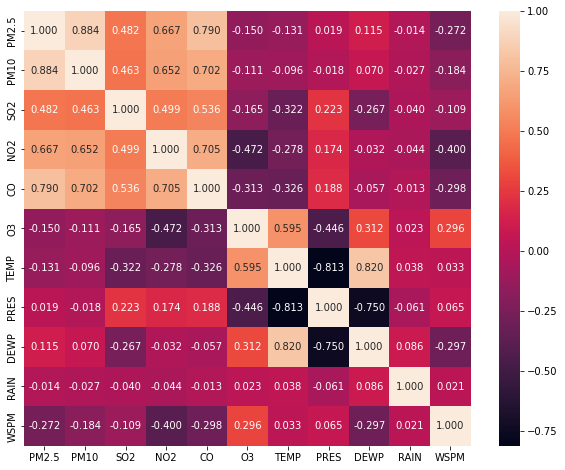

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".3f")

<AxesSubplot:xlabel='PM2.5', ylabel='PM10'>

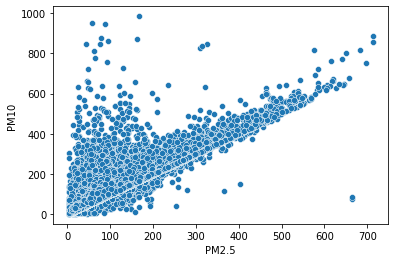

In [24]:
target = df.loc[df['station']=='Aotizhongxin']
sns.scatterplot(x=target['PM2.5'], y=target['PM10'])